In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.single_selected_feature_configs import *
import scipy
import argparse
import copy

### Sam, fb onset long, all conds

In [3]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"

res = io_utils.read_selected_features(args, FEATURES)

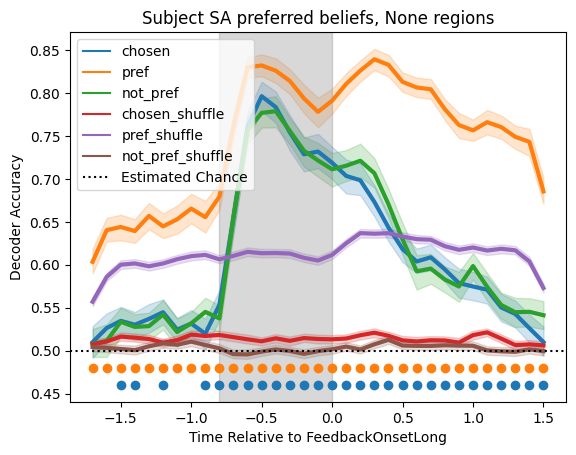

In [4]:
fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref", .01 / 32)
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(res, "not_pref", .01 / 32)
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")

### Sam fb onset, all conds, v2 pseudo data generation

In [2]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.use_v2_pseudo = True

res = io_utils.read_selected_features(args, FEATURES)

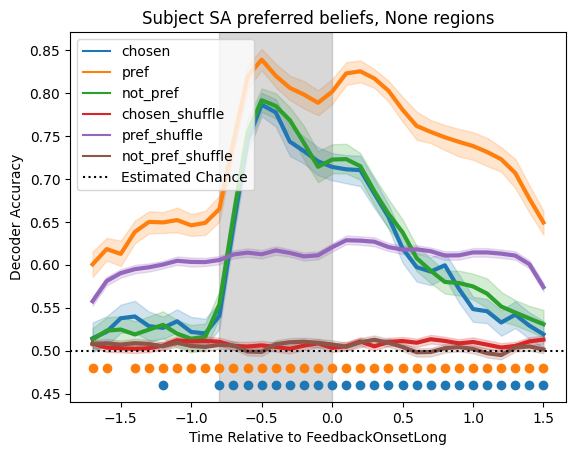

In [3]:
fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref", .01 / 32)
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(res, "not_pref", .01 / 32)
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")

### Sam, fb onset long, all conds, only corrects

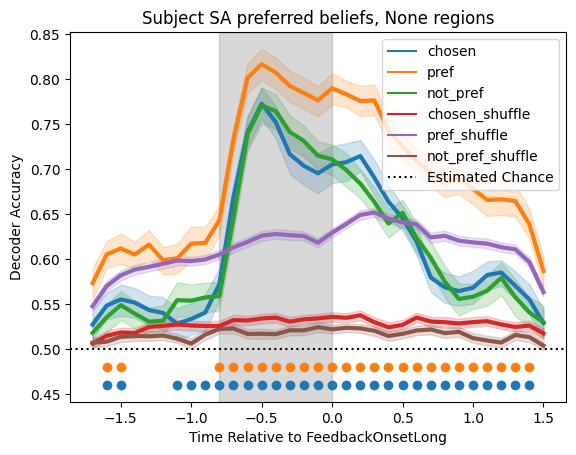

In [4]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.beh_filters = {"Response": "Correct"}

res = io_utils.read_selected_features(args, FEATURES)

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref", .01 / 32)
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(res, "not_pref", .01 / 32)
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")

### Sam fb onset, filtered for preferred was chosen, v2 pseudo

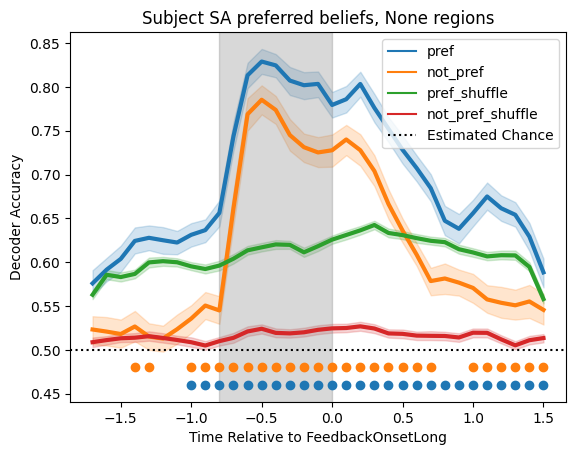

In [4]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.beh_filters = {"PreferredChosen": True}
args.use_v2_pseudo = True

res = io_utils.read_selected_features(args, FEATURES, conds=["pref", "not_pref"])

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref")
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(res, "not_pref")
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")

### Sam, fb onset long, all conds, only corrects, temporal drive

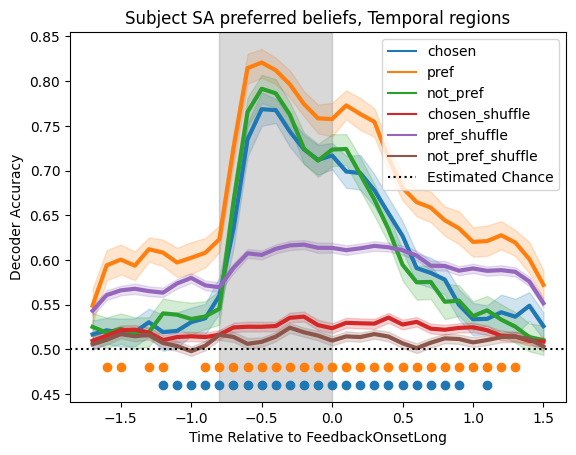

In [3]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.beh_filters = {"Response": "Correct"}
args.region_level = "drive"
args.regions = "Temporal"

res = io_utils.read_selected_features(args, FEATURES)

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref", .01 / 32)
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(res, "not_pref", .01 / 32)
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")

### Sam fb onset, filtered for preferred was chosen, v2 pseudo, temporal only

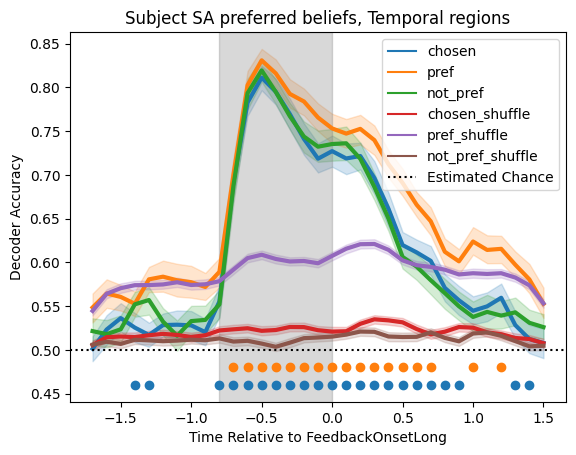

In [6]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.region_level = "drive"
args.regions = "Temporal"
args.beh_filters = {"PreferredChosen": True}
args.use_v2_pseudo = True

res = io_utils.read_selected_features(args, FEATURES)

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref", .01 / 32)
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(res, "not_pref", .01 / 32)
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")

### Sam, fb onset long, pref vs. not pref

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


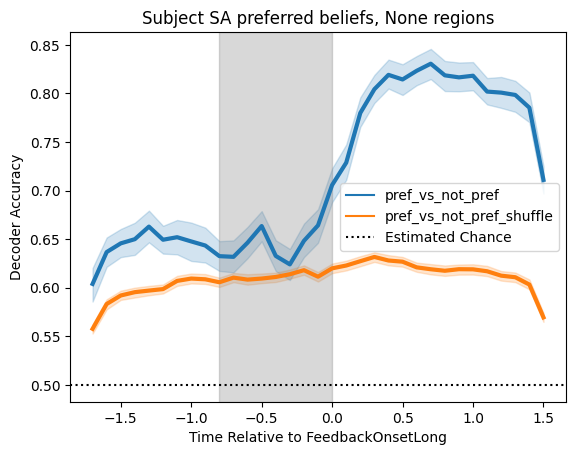

In [3]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"

res = io_utils.read_selected_features(args, FEATURES, conds=["pref_vs_not_pref"])
fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref", .01 / 32)
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(res, "not_pref", .01 / 32)
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")


### Sam, fb onset long, pref vs. not pref, only corrects

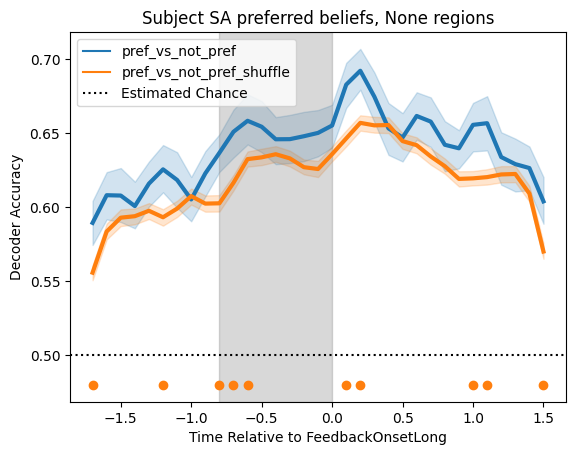

In [4]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.beh_filters = {"Response": "Correct"}

res = io_utils.read_selected_features(args, FEATURES, conds=["pref_vs_not_pref"])
fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

sig_times = classifier_utils.get_significant_time_bins(res, "pref_vs_not_pref")
ax.scatter(sig_times, np.ones(len(sig_times)) * 0.48, color="tab:orange")


### Sam, fb onset long, all conds, temporal drive

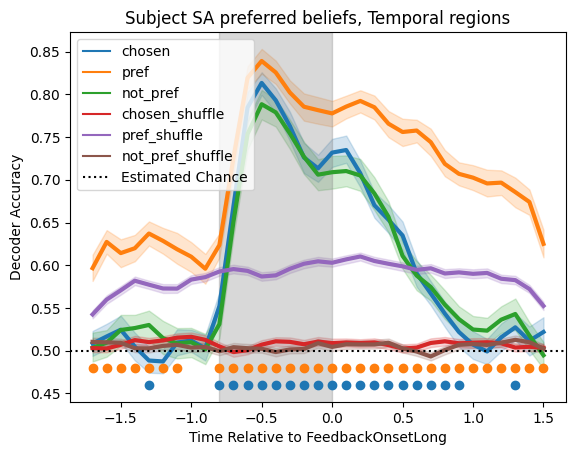

In [3]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.region_level = "drive"
args.regions = "Temporal"

res = io_utils.read_selected_features(args, FEATURES)

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref", .01 / 32)
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(res, "not_pref", .01 / 32)
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")

### Sam, Stim onset, all conds

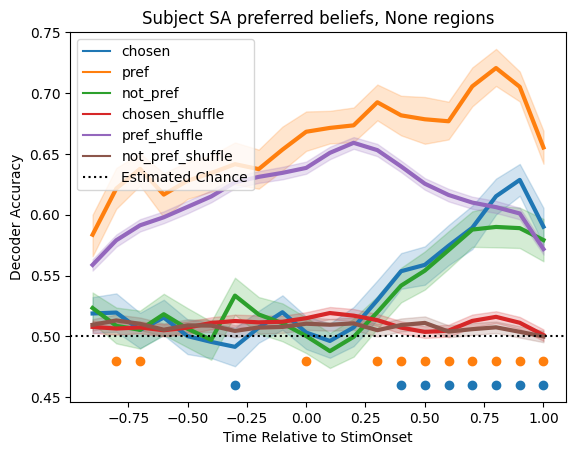

In [3]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)

res = io_utils.read_selected_features(args, FEATURES)

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref", .01 / 32)
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(res, "not_pref", .01 / 32)
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")

### Sam, feature chosen, correct/incorrect fb for high bsv

In [4]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.beh_filters = {"BeliefStateValueBin": 1, "Response": "Correct"}
args.balance_by_filters = True
args.use_v2_pseudo = True

cor_res = io_utils.read_selected_features(args, FEATURES, conds=["chosen"])
cor_res["condition"] = cor_res["condition"] + " correct"

inc_args = args
inc_args.beh_filters = {"BeliefStateValueBin": 1, "Response": "Incorrect"}
inc_res = io_utils.read_selected_features(inc_args, FEATURES, conds=["chosen"])
inc_res["condition"] = inc_res["condition"] + " incorrect"

res = pd.concat((cor_res, inc_res))


Warning, shuffle not found: CIRCLE_chosen_shuffle_0
Warning, shuffle not found: SQUARE_chosen_shuffle_0
Warning, shuffle not found: TRIANGLE_chosen_shuffle_0
Warning, shuffle not found: MAGENTA_chosen_shuffle_0
Warning, shuffle not found: YELLOW_chosen_shuffle_0
Warning, shuffle not found: POLKADOT_chosen_shuffle_0
Warning, shuffle not found: RIPPLE_chosen_shuffle_0
Warning, shuffle not found: SWIRL_chosen_shuffle_0
Warning, shuffle not found: CIRCLE_chosen_shuffle_1
Warning, shuffle not found: SQUARE_chosen_shuffle_1
Warning, shuffle not found: TRIANGLE_chosen_shuffle_1
Warning, shuffle not found: MAGENTA_chosen_shuffle_1
Warning, shuffle not found: YELLOW_chosen_shuffle_1
Warning, shuffle not found: POLKADOT_chosen_shuffle_1
Warning, shuffle not found: RIPPLE_chosen_shuffle_1
Warning, shuffle not found: SWIRL_chosen_shuffle_1
Warning, shuffle not found: CIRCLE_chosen_shuffle_2
Warning, shuffle not found: SQUARE_chosen_shuffle_2
Warning, shuffle not found: TRIANGLE_chosen_shuffle_2
Wa

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


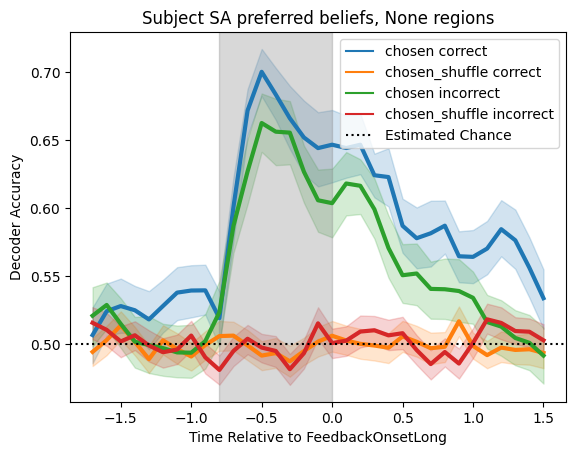

In [20]:
fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)

pref_sig_times = classifier_utils.get_significant_time_bins(res, "pref", .01 / 32)
ax.scatter(pref_sig_times, np.ones(len(pref_sig_times)) * 0.48, color="tab:orange")

not_pref_sig_times = classifier_utils.get_significant_time_bins(res, "not_pref", .01 / 32)
ax.scatter(not_pref_sig_times, np.ones(len(not_pref_sig_times)) * 0.46, color="tab:blue")

### Sam, feature chosen, correct/incorrect fb for low bsv

Warning, shuffle not found: CIRCLE_chosen_shuffle_0
Warning, shuffle not found: SQUARE_chosen_shuffle_0
Warning, shuffle not found: TRIANGLE_chosen_shuffle_0
Warning, shuffle not found: MAGENTA_chosen_shuffle_0
Warning, shuffle not found: YELLOW_chosen_shuffle_0
Warning, shuffle not found: POLKADOT_chosen_shuffle_0
Warning, shuffle not found: RIPPLE_chosen_shuffle_0
Warning, shuffle not found: SWIRL_chosen_shuffle_0
Warning, shuffle not found: CIRCLE_chosen_shuffle_1
Warning, shuffle not found: SQUARE_chosen_shuffle_1
Warning, shuffle not found: TRIANGLE_chosen_shuffle_1
Warning, shuffle not found: MAGENTA_chosen_shuffle_1
Warning, shuffle not found: YELLOW_chosen_shuffle_1
Warning, shuffle not found: POLKADOT_chosen_shuffle_1
Warning, shuffle not found: RIPPLE_chosen_shuffle_1
Warning, shuffle not found: SWIRL_chosen_shuffle_1
Warning, shuffle not found: CIRCLE_chosen_shuffle_2
Warning, shuffle not found: SQUARE_chosen_shuffle_2
Warning, shuffle not found: TRIANGLE_chosen_shuffle_2
Wa

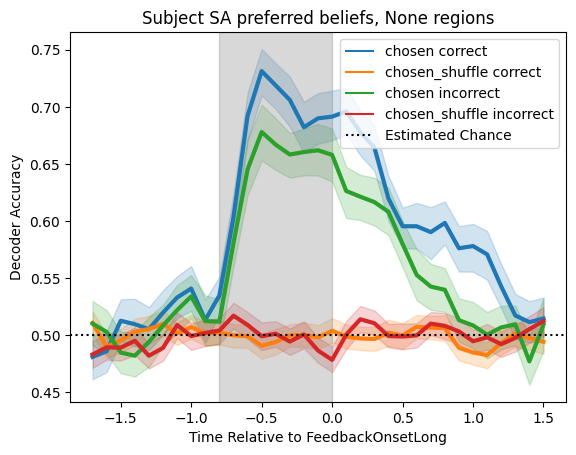

In [3]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.beh_filters = {"BeliefStateValueBin": 0, "Response": "Correct"}
args.balance_by_filters = True
args.use_v2_pseudo = True

cor_res = io_utils.read_selected_features(args, FEATURES, conds=["chosen"])
cor_res["condition"] = cor_res["condition"] + " correct"

inc_args = args
inc_args.beh_filters = {"BeliefStateValueBin": 0, "Response": "Incorrect"}
inc_res = io_utils.read_selected_features(inc_args, FEATURES, conds=["chosen"])
inc_res["condition"] = inc_res["condition"] + " incorrect"

res = pd.concat((cor_res, inc_res))

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)


### Sam, feature chosen, correct/incorrect fb for all BSV

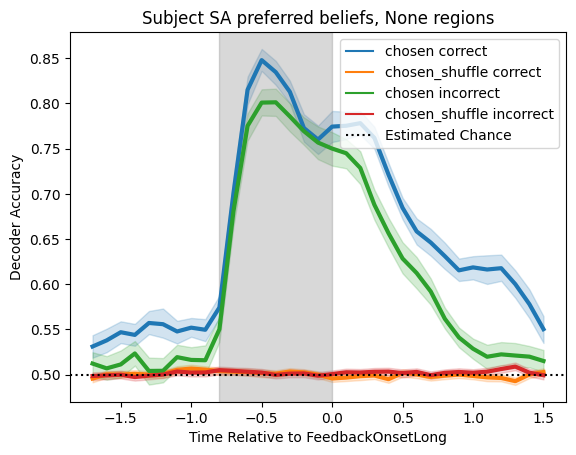

In [5]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.beh_filters = {"Response": "Correct"}
args.balance_by_filters = True
args.use_v2_pseudo = True

cor_res = io_utils.read_selected_features(args, FEATURES, conds=["chosen"])
cor_res["condition"] = cor_res["condition"] + " correct"

inc_args = args
inc_args.beh_filters = {"Response": "Incorrect"}
inc_res = io_utils.read_selected_features(inc_args, FEATURES, conds=["chosen"])
inc_res["condition"] = inc_res["condition"] + " incorrect"

res = pd.concat((cor_res, inc_res))

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)


### Just bsv difference

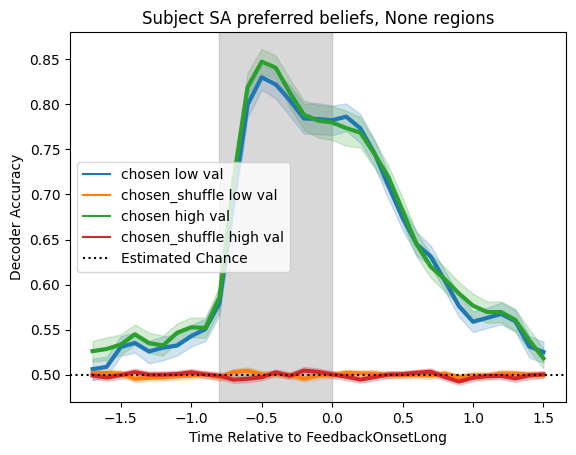

In [7]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.beh_filters = {"BeliefStateValueBin": 0}
args.balance_by_filters = True
args.use_v2_pseudo = True

low_res = io_utils.read_selected_features(args, FEATURES, conds=["chosen"])
low_res["condition"] = low_res["condition"] + " low val"

args = args
args.beh_filters = {"BeliefStateValueBin": 1}
high_res = io_utils.read_selected_features(args, FEATURES, conds=["chosen"])
high_res["condition"] = high_res["condition"] + " high val"

res = pd.concat((low_res, high_res))

fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, res, ax)


### Seems like difference might actually be in high vs. low bsv, regardless of correct/inc feedback

Warning, shuffle not found: CIRCLE_chosen_shuffle_0
Warning, shuffle not found: SQUARE_chosen_shuffle_0
Warning, shuffle not found: TRIANGLE_chosen_shuffle_0
Warning, shuffle not found: MAGENTA_chosen_shuffle_0
Warning, shuffle not found: YELLOW_chosen_shuffle_0
Warning, shuffle not found: POLKADOT_chosen_shuffle_0
Warning, shuffle not found: RIPPLE_chosen_shuffle_0
Warning, shuffle not found: SWIRL_chosen_shuffle_0
Warning, shuffle not found: CIRCLE_chosen_shuffle_1
Warning, shuffle not found: SQUARE_chosen_shuffle_1
Warning, shuffle not found: TRIANGLE_chosen_shuffle_1
Warning, shuffle not found: MAGENTA_chosen_shuffle_1
Warning, shuffle not found: YELLOW_chosen_shuffle_1
Warning, shuffle not found: POLKADOT_chosen_shuffle_1
Warning, shuffle not found: RIPPLE_chosen_shuffle_1
Warning, shuffle not found: SWIRL_chosen_shuffle_1
Warning, shuffle not found: CIRCLE_chosen_shuffle_2
Warning, shuffle not found: SQUARE_chosen_shuffle_2
Warning, shuffle not found: TRIANGLE_chosen_shuffle_2
Wa

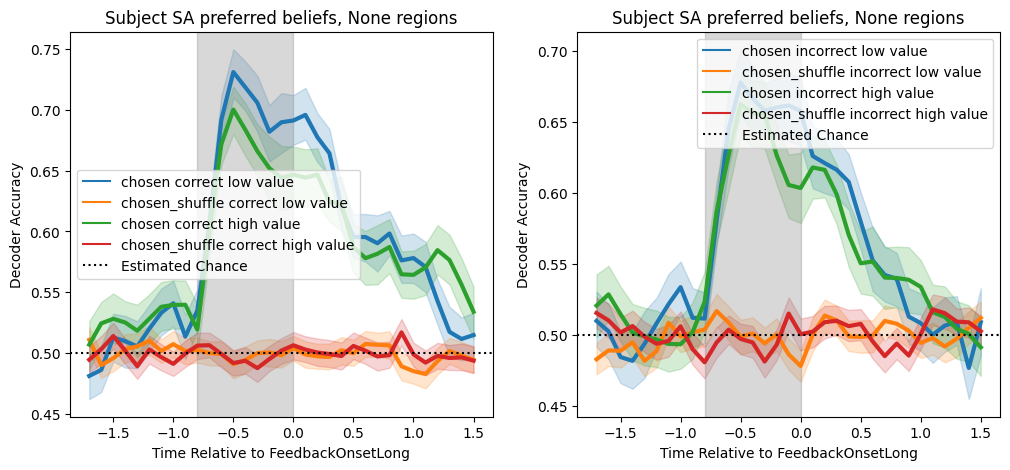

In [4]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.beh_filters = {"BeliefStateValueBin": 0, "Response": "Correct"}
args.balance_by_filters = True
args.use_v2_pseudo = True   

cor_low_res = io_utils.read_selected_features(args, FEATURES, conds=["chosen"])
cor_low_res["condition"] = cor_low_res["condition"] + " correct low value"

args.beh_filters = {"BeliefStateValueBin": 0, "Response": "Incorrect"}
inc_low_res = io_utils.read_selected_features(args, FEATURES, conds=["chosen"])
inc_low_res["condition"] = inc_low_res["condition"] + " incorrect low value"

args.beh_filters = {"BeliefStateValueBin": 1, "Response": "Correct"}
cor_high_res = io_utils.read_selected_features(args, FEATURES, conds=["chosen"])
cor_high_res["condition"] = cor_high_res["condition"] + " correct high value"

args.beh_filters = {"BeliefStateValueBin": 1, "Response": "Incorrect"}
inc_high_res = io_utils.read_selected_features(args, FEATURES, conds=["chosen"])
inc_high_res["condition"] = inc_high_res["condition"] + " incorrect high value"

cor_res = pd.concat((cor_low_res, cor_high_res))
inc_res = pd.concat((inc_low_res, inc_high_res))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
visualization_utils.visualize_preferred_beliefs(args, cor_res, ax1)
visualization_utils.visualize_preferred_beliefs(args, inc_res, ax2)



### different fr simulations to check shuffled baseline accuracy
Time shuffling for baseline accuracy, so looking at how different "frs" affect it: 
- white noise, no signal in frs
- trial number, straight time
- pref belief: unit n is 1 for when feature y is preferred if n % 12 = y

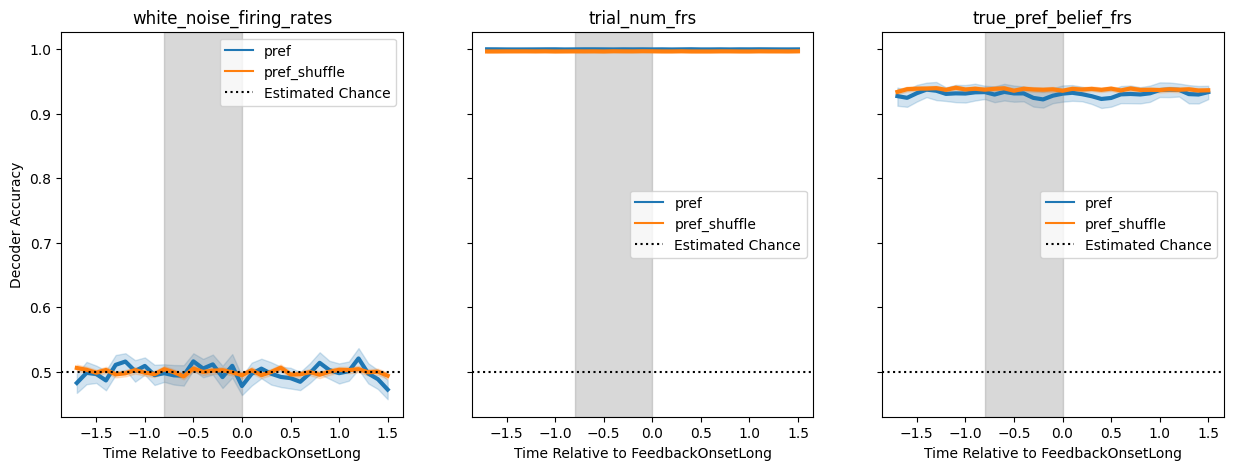

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, fr_type in enumerate(["white_noise_firing_rates", "trial_num_frs", "true_pref_belief_frs"]):
    args = argparse.Namespace(
        **SingleSelectedFeatureConfigs()._asdict()
    )
    args.fr_type = fr_type
    args.trial_event = "FeedbackOnsetLong"
    res = io_utils.read_selected_features(args, FEATURES, conds=["pref"])
    visualization_utils.visualize_preferred_beliefs(args, res, axs[i])
    axs[i].set_title(fr_type)

### Sam, fb onset, cross cond pref/not pref

In [11]:
args = argparse.Namespace(
    **SingleSelectedFeatureCrossCondConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.beh_filters = {"PreferredChosen": True}
args.use_v2_pseudo = True

cross_res = io_utils.read_selected_features_cross_cond(args, FEATURES, ["pref", "not_pref"])

args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.beh_filters = {"PreferredChosen": True}
args.use_v2_pseudo = True

res = io_utils.read_selected_features(args, FEATURES, conds=["pref", "not_pref"])

all_res = pd.concat((res, cross_res))

Text(0.5, 1.0, 'Not Preferred')

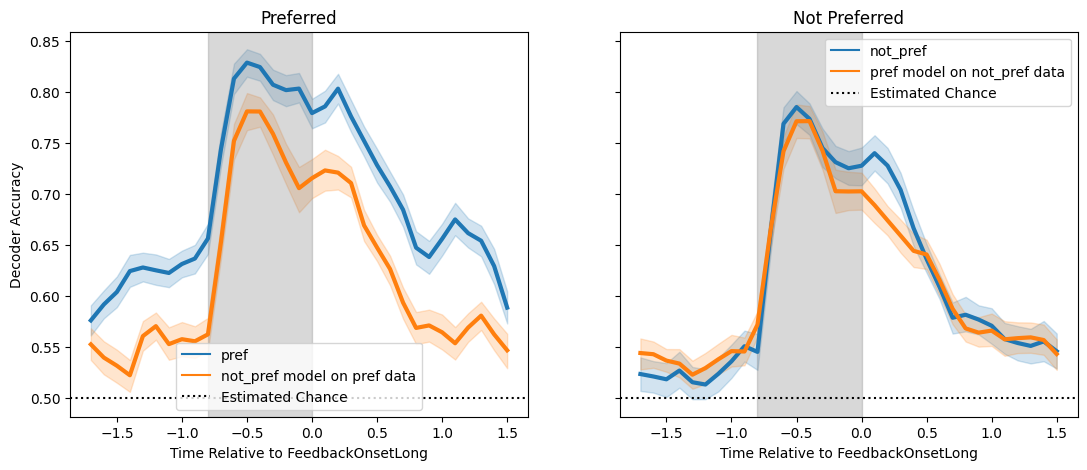

In [14]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(13, 5), sharey=True)

pref_res = all_res[all_res.condition.isin(["pref", "not_pref model on pref data"])]
visualization_utils.visualize_preferred_beliefs(args, pref_res, ax0)
ax0.set_title("Preferred")


not_pref_res = all_res[all_res.condition.isin(["not_pref", "pref model on not_pref data"])]
visualization_utils.visualize_preferred_beliefs(args, not_pref_res, ax1)
ax1.set_title("Not Preferred")
